<a href="https://colab.research.google.com/github/Naandes/Dados-Financeiros-do-Sus/blob/main/modulo_1/aula_1/Outros_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação de bibliotecas**

Vamos importar agora todas as bibliotecas que serão usadas na aula 1 do módulo 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## **Importação e limpeza do DataFrame**

Vamos agoras importar o nosso DataFrame e deixar o melhor possível para as análises posteriores

### **Importação do DataFrame**

O DataFrame que estamos pegando é do DATASUS, uma fonte de dados do governo sobre a saúde pública. Mais específico, ele é referente sobre o valor gasto com internações por estado de acordo que foi processado a internação, na faixa de tempo de Janeiro de 2008 até Março de 2021.

In [ ]:
##Importando DataFrame
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv"
df = pd.read_csv(uri, encoding='ISO-8859-1',skiprows = 3, sep = ';', skipfooter = 12, thousands='.', decimal=',')
df.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of       Unidade da Federação     2008/Jan  ...      2020/Ago         Total
0              11 Rondônia   1388528.39  ...   10285455.78  9.291297e+08
1                  12 Acre    902416.00  ...             -  4.206680e+08
2              13 Amazonas   4735529.42  ...   14726443.67  1.771655e+09
3               14 Roraima    657889.53  ...    2826486.18  3.050109e+08
4                  15 Pará  18864744.11  ...   39911193.02  4.437116e+09
5                 16 Amapá   1120973.34  ...    2942273.94  2.916380e+08
6             17 Tocantins   3441592.69  ...    8240261.38  9.999986e+08
7              21 Maranhão  10723506.39  ...   28587541.78  3.632861e+09
8                 22 Piauí   7985142.43  ...   23210624.20  2.130616e+09
9                 23 Ceará  15539821.90  ...   59808605.59  6.197357e+09
10  24 Rio Grande do Norte   5947814.08  ...   24929930.72  2.477372e+09
11              25 Paraíba  10723002.45  ...   22130016.81  2.470550e+09
12           26 Perna

### **Tratando o dataframe**

Vamos renomear as colunas dos estados do Brasil mais o distríto federal com suas abreviações.

#### **Renomeando alguns nomes**

In [ ]:
df["Unidade da Federação"].unique() #Facilitar para copiar os nomes únicos da coluna

array(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco',
       '27 Alagoas', '28 Sergipe', '29 Bahia', '31 Minas Gerais',
       '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo',
       '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul',
       '50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás',
       '53 Distrito Federal'], dtype=object)

In [ ]:
maps = {'11 Rondônia' : 'RO' , 
        '12 Acre' : 'AC',
        '13 Amazonas' : 'AM',
        '14 Roraima' : 'RR',
        '15 Pará' : 'PA',
       '16 Amapá' : 'AP',
        '17 Tocantins' : 'TO',
        '21 Maranhão' : 'MA',
        '22 Piauí' : 'PI', 
        '23 Ceará' : 'CE',
       '24 Rio Grande do Norte' : 'RN',
        '25 Paraíba' : 'PB',
        '26 Pernambuco' :'PE',
       '27 Alagoas' : 'AL',
        '28 Sergipe' : 'SE', 
        '29 Bahia' : 'BA', 
        '31 Minas Gerais' : 'MG',
       '32 Espírito Santo' : 'ES', 
        '33 Rio de Janeiro' : 'RJ', 
        '35 São Paulo' : 'SP',
       '41 Paraná' : 'PR', 
        '42 Santa Catarina' : 'SC', 
        '43 Rio Grande do Sul' : 'RS',
       '50 Mato Grosso do Sul' : 'MS', 
        '51 Mato Grosso' : 'MT', 
        '52 Goiás' : 'GO',
       '53 Distrito Federal' : 'DF'}

In [ ]:
df.rename(columns={'Unidade da Federação': 'UF'}, inplace=True) #Trocando nome de Unidade da Federação para UF
df['UF'] = df.replace({'UF': maps}) #Trocando os nomes dos estados pelas abreviações
df


,UF,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,RO,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.948292e+06,8.438077e+06,7.656645e+06,8.047743e+06,8.657206e+06,8.150894e+06,7.507845e+06,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,AC,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,2.397513e+06,2.348760e+06,3.139155e+06,2.765063e+06,4.540085e+06,4.120229e+06,2.610455e+06,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,-,4.206680e+08
2,AM,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.278964e+07,1.437699e+07,1.424007e+07,1.359465e+07,1.458429e+07,1.315872e+07,1.316966e+07,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.573120e+07,1.574461e+07,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,RR,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.244339e+06,1.085679e+06,9.695285e+05,1.393227e+06,1.273734e+06,1

Vamos analisar agora que tipo de dados o dataframe possui.

#### **Dados Faltantes**

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:10]

Total       0
2011/Dez    0
2012/Jul    0
2012/Jun    0
2012/Mai    0
2012/Abr    0
2012/Mar    0
2012/Fev    0
2012/Jan    0
2011/Nov    0
dtype: int64

`Peguei as 10 colunas que provavelmente teriam os maiores números de valores nulos e em nenhum possui dados nulos. Agora vamos analisar como estão comportados as colunas do DataFrame`

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 154 columns):
 #   Column    Dtype  
---  ------    -----  
 0   UF        object 
 1   2008/Jan  float64
 2   2008/Fev  float64
 3   2008/Mar  float64
 4   2008/Abr  float64
 5   2008/Mai  float64
 6   2008/Jun  float64
 7   2008/Jul  float64
 8   2008/Ago  float64
 9   2008/Set  float64
 10  2008/Out  float64
 11  2008/Nov  float64
 12  2008/Dez  float64
 13  2009/Jan  float64
 14  2009/Fev  float64
 15  2009/Mar  float64
 16  2009/Abr  float64
 17  2009/Mai  float64
 18  2009/Jun  float64
 19  2009/Jul  float64
 20  2009/Ago  float64
 21  2009/Set  object 
 22  2009/Out  float64
 23  2009/Nov  float64
 24  2009/Dez  float64
 25  2010/Jan  float64
 26  2010/Fev  float64
 27  2010/Mar  float64
 28  2010/Abr  float64
 29  2010/Mai  float64
 30  2010/Jun  float64
 31  2010/Jul  float64
 32  2010/Ago  float64
 33  2010/Set  float64
 34  2010/Out  float64
 35  2010/Nov  float64
 36  2010/Dez  float64

`Podemos perceber que a coluna '2009/Set' e '2020/Ago' são do tipo 'object'. Vamos olhar os valores unicos de cada coluna.`



In [ ]:
print('Valores únicos da coluna [2009/Set]: \n')
print(df['2009/Set'].unique())
print('\nValores únicos da coluna [2020/Ago]: \n')
print(df['2020/Ago'].unique())

Valores únicos da coluna [2009/Set]: 

['3605007.43' '-' '9730634.16' '1701611.25' '27967969.22' '2034329.78'
 '6542918.14' '19722895.51' '12247027.29' '34471579.06' '13213817.60'
 '16117680.24' '37971068.17' '11170853.09' '6341601.06' '53839068.59'
 '96911075.38' '15382323.46' '52027721.77' '220292973.66' '65843824.73'
 '37380382.93' '66425009.36' '11997775.92' '10810420.65' '25227845.74'
 '14487053.32']

Valores únicos da coluna [2020/Ago]: 

['10285455.78' '-' '14726443.67' '2826486.18' '39911193.02' '2942273.94'
 '8240261.38' '28587541.78' '23210624.20' '59808605.59' '24929930.72'
 '22130016.81' '75704177.72' '19754741.78' '11014180.89' '80793117.08'
 '168024412.95' '32188873.88' '95274486.35' '346512263.17' '129375911.54'
 '63972379.36' '101374341.51' '19241624.02' '17790649.87' '43984702.05'
 '26526196.39']


Podemos perceber que entre os dados possui o valor '-' e precisamos tratar esse dado. Para substituir, na coluna [2009/Set] irei fazer a média do estado do mês anterior e o mês posterior e da coluna [2020/Ago] irei pegar o mês anterior. 

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

In [ ]:
#Posição [1] que é o dado faltante
df['2009/Set'][1] = (df['2009/Ago'][1] + df['2009/Out'][1]) / 2
for indice in range(len(df['2009/Set'])):
  df['2009/Set'][indice] = float(df['2009/Set'][indice])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df['2020/Ago']

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

In [ ]:
#Posição [1] que é o dado faltante
df['2020/Ago'][1] = df['2020/Jul'][1]
for indice2 in range(len(df['2020/Ago'])):
  df['2020/Ago'][indice2] = float(df['2020/Ago'][indice2])
  


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##**Gráficos**

Vamos criar um histograma com o total gasto por estados.

Text(0.5, 1.0, 'Valor gasto por Estados')

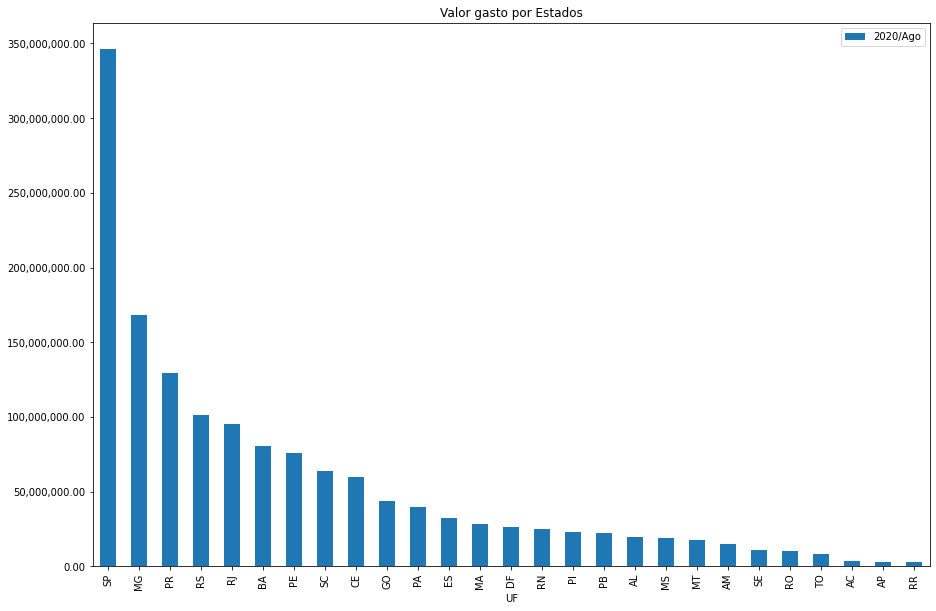

In [ ]:
mes_mais_recente = df.columns[-2]
ax = df.sort_values(mes_mais_recente, ascending=False).plot(x='UF', y=mes_mais_recente, kind='bar', figsize=(15,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor gasto por Estados')